<a href="https://colab.research.google.com/github/ganeshbmc/graded/blob/master/BA/GA1/ga1_ba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

In [23]:
df = pd.read_excel("/content/chi_sq_GOF.xlsx").iloc[:, 1:]
df.head()

,data
0,3
1,3
2,2
3,6
4,4


In [24]:
df.shape

(100, 1)

In [25]:
df.columns

Index(['data'], dtype='object')

In [26]:
df['data'].value_counts()

3     19
4     19
2     18
1     17
5     11
0      6
6      5
7      2
9      1
8      1
10     1
Name: data, dtype: int64

In [45]:
# sm.qqplot(df['data'], stats.poisson(3.12), line='45')

#`Q1`  

In [28]:
df['data'].describe()

count    100.000000
mean       3.120000
std        1.981123
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: data, dtype: float64

Ans: Not symmetric because right tail is long.  

#`Q2`  

<Axes: xlabel='data', ylabel='Count'>

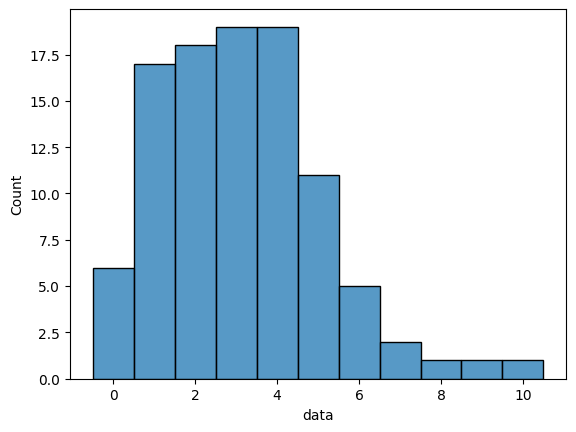

In [29]:
sns.histplot(data=df['data'], discrete=True)

Ans: Poisson distribution.
Discrete values, large right tail on histogram.

#`Q3`  

In [30]:
df['data'].mean()

3.12

#`Q4`  

`Null hypothesis: The given data follows Poisson distribution`  
`Alternate hypothesis: The given data does NOT follow Poisson distribution`  

In [73]:
# Step-1 in Chi-squaare GOF: Create Bins
# Step-2 in Chi-square GOF: Count the number of observations in each bin

df_2 = pd.DataFrame()
df_2['obs_freq'] = df.groupby('data')['data'].count()
df_2

,obs_freq
data,
0,6
1,17
2,18
3,19
4,19
5,11
6,5
7,2
8,1


In [74]:
# Step-3: In Chi-suare GOF: Determine the expected number of observations in each bin
df_2['poisson_pmf'] = poisson.pmf(k=df_2.index, mu=df['data'].mean())
df_2

,obs_freq,poisson_pmf
data,,
0,6,0.044157
1,17,0.137770
2,18,0.214922
3,19,0.223519
4,19,0.174345
5,11,0.108791
6,5,0.056571
7,2,0.025215
8,1,0.009834


In [75]:
df_2['exp_freq'] = df_2['poisson_pmf']*len(df)
df_2

,obs_freq,poisson_pmf,exp_freq
data,,,
0,6,0.044157,4.415717
1,17,0.137770,13.777037
2,18,0.214922,21.492177
3,19,0.223519,22.351864
4,19,0.174345,17.434454
5,11,0.108791,10.879099
6,5,0.056571,5.657132
7,2,0.025215,2.521464
8,1,0.009834,0.983371


In [79]:
sum_exp_freq = df_2['exp_freq'].sum()
print(sum_exp_freq)
diff = 100 - sum_exp_freq
diff

99.95957831080472


0.040421689195284216

In [81]:
# Add difference to last expected freq in df_2
print(df_2.loc[10, 'exp_freq'])
df_2.loc[10, 'exp_freq'] = df_2.loc[10, 'exp_freq'] + diff
print(df_2.loc[10, 'exp_freq'])

0.10636141924899659
0.1467831084442808


In [82]:
# Step-4A: In Chi-square GOF: Determine teh test statistics and P-value
chisquare(df_2['obs_freq'], df_2['exp_freq'])

Power_divergenceResult(statistic=8.95269084059234, pvalue=0.5365992182145463)

##`Q4 ans: p-value = 0.54`  

#`Q5`  

`Inference using p-value:`  
`p-value is greater than level of significance (alpha=0.05).`    
`Therefore, fail to reject null hyothesis.`  
`Conclude that the given sample follows Poisson distribution.`  

#`Q6`  

In [85]:
chisquare(df_2['obs_freq'], df_2['exp_freq'])

Power_divergenceResult(statistic=8.95269084059234, pvalue=0.5365992182145463)

##`Q6 ans: 8.95`  

#`Q7`

In [84]:
# Calculate chi2 statistic for 95% CI
chi2.ppf(0.95, len(df_2) -1 -1)

16.918977604620448

#`Q8`  

`Inference using chi2 statistic:`  
`Calculated chi2 value (8.95) is smaller than the tabulated chi2 value (16.92).`    
`Therefore, fail to reject null hyothesis.`   

# Test of independence  
`Load 'chi_sq_TOI.xlsx' dataset`  


In [87]:
df_toi = pd.read_excel('/content/chi_sq_TOI.xlsx')
df_toi

,Platform,Preference
0,Hola,Seadan
1,Druber,Hatchback
2,Hola,MPV
3,Druber,Seadan
4,Druber,Seadan
...,...,...
139,Hola,Seadan
140,Hola,Seadan
141,Hola,Seadan
142,Hola,Seadan


In [90]:
df_toi.shape

(144, 2)

In [92]:
contingency_table = pd.crosstab(df_toi['Platform'], df_toi['Preference'], margins=True)
contingency_table

Preference,Hatchback,MPV,Seadan,All
Platform,,,,
Druber,36,33,12,81
Hola,30,6,27,63
All,66,39,39,144


In [93]:
contingency_table.T

Platform,Druber,Hola,All
Preference,,,
Hatchback,36,30,66
MPV,33,6,39
Seadan,12,27,39
All,81,63,144


In [94]:
contingency_table['Hatchback']

Platform
Druber    36
Hola      30
All       66
Name: Hatchback, dtype: int64

In [95]:
contingency_table['Hatchback']['Hola']

30

In [97]:
platforms = list(df_toi['Platform'].unique())
preferences = list(df_toi['Preference'].unique())
platforms, preferences

(['Hola', 'Druber'], ['Seadan', 'Hatchback', 'MPV'])

In [99]:
exp1 = {}

for i in platforms:
  exp2 = {}
  for j in preferences:
    exp2[j] = (contingency_table.transpose()[i]['All'] * contingency_table[j]['All']) / contingency_table['All']['All']
  exp1[i] = exp2

In [100]:
exp1

{'Hola': {'Seadan': 17.0625, 'Hatchback': 28.875, 'MPV': 17.0625},
 'Druber': {'Seadan': 21.9375, 'Hatchback': 37.125, 'MPV': 21.9375}}

In [101]:
# Cross check manually
(63*39)/144

17.0625

#`Q9`  

In [104]:
dof = (len(platforms) - 1) * (len(preferences) - 1)
dof

2

#`Q10`  

In [103]:
# Chi-square calculation
calc_chi2 = 0
for i in platforms:
  for j in preferences:
    val = (contingency_table.transpose()[i][j] - exp1[i][j]) ** 2 / exp1[i][j]
    calc_chi2 += val
calc_chi2

23.118215118215122

#`Q11`  

In [105]:
# Tabulated chi-square
stats.chi2.ppf(1-0.05, df=dof)

5.991464547107979

#`Q12`  

### Shortcut

In [112]:
cont_tab = np.array(contingency_table.iloc[0:2, 0:3])
cont_tab

array([[36, 33, 12],
       [30,  6, 27]])

In [108]:
# cont_tab = np.array([contingency_table.transpose()['Druber'][0:3].values,
#                      contingency_table.transpose()['Hola'][0:3].values])
# cont_tab

array([[36, 33, 12],
       [30,  6, 27]])

In [113]:
stats.chi2_contingency(cont_tab)

Chi2ContingencyResult(statistic=23.11821511821512, pvalue=9.548680704813064e-06, dof=2, expected_freq=array([[37.125 , 21.9375, 21.9375],
       [28.875 , 17.0625, 17.0625]]))

##`Ans: p-value is less than 0.05`  

#`Q13`  

In [107]:
exp1['Hola']['Hatchback']

28.875

##`Ans: Expected freqency of Hatchback in Hola is 28`  

#`Q14`  

`Null hypothesis: Categorical variables are independent`  
`Alternate hypothesis: Categorical variables are NOT independent`  

`Inference using p-value:`  
`p-value is lesser than level of significance (alpha=0.05).`    
`Therefore, reject null hyothesis.`  
`Conclude that categorical variables are NOT independent.`  